## Image Color Segmentation (with HSV)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
from typing import Tuple


In [6]:
def image_color_summarizer(rgb_img: np.ndarray
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:
    hsv_img = rgb2hsv(rgb_img)
    return (hsv_img[:,:,0], hsv_img[:,:,1], hsv_img[:,:,2])


In [7]:
from skimage import data
# get coffee image for testing
COFFEE = data.coffee()
hue, saturation, value = image_color_summarizer(COFFEE)

Text(0.5, 1.0, 'Value')

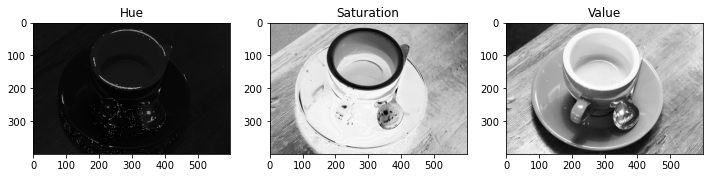

In [8]:
# Understanding Hue, Saturation, and Value
fig, ax = plt.subplots(1, 3, figsize=(12,4))
ax[0].imshow(hue, cmap='gray')
ax[0].set_title('Hue')
ax[1].imshow(saturation, cmap='gray')
ax[1].set_title('Saturation')
ax[2].imshow(value, cmap='gray')
ax[2].set_title('Value')

## Face Detection

In [9]:
from skimage import data
from skimage import feature

import matplotlib.pyplot as plt
from matplotlib import patches

In [29]:
def detect_faces(trained_file: str, img: np.ndarray) -> plt.Axes:
    # Initialize the detector cascade.
    detector = feature.Cascade(trained_file)

    detected = detector.detect_multi_scale(img=img,
                                        scale_factor=1.2,
                                        step_ratio=1,
                                        min_size=(60, 60),
                                        max_size=(123, 123))

    plt.imshow(img)
    img_desc = plt.gca()
    plt.set_cmap('gray')

    face_rectangles = []
    for rectangle in detected:
        face_rectangle = {
            "x": rectangle['c'],
            "y": rectangle['r'],
            "width":rectangle['width'],
            "height":rectangle['height'],
        }
        face_rectangles.append(face_rectangle)
   
    return face_rectangles


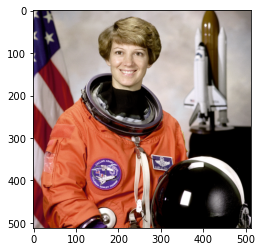

In [30]:
# Load the trained file from the module root.
trained_file = data.lbp_frontal_face_cascade_filename()
img = data.astronaut()
face_rectangles = detect_faces(trained_file, img)

## Next Steps

## We've established we can detect faces and we can rate an image's hue, saturation, and value. 

Let's check out HSV on the face image.

In [31]:
# Crop everything out but the face.
def crop(face_rectangle, img: np.ndarray):
    x0 = face_rectangle["x"]
    y0 = face_rectangle["y"]
    width = face_rectangle["width"]
    height = face_rectangle["height"]
    return img[y0:y0+height , x0:x0+width, :]



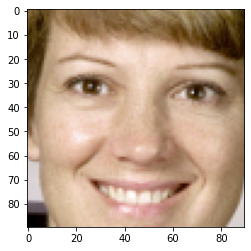

In [32]:
new_img = crop(face_rectangles[0], img)
plt.imshow(new_img)